Symbols

As a simplified example, let’s say we have a wire and are sending 1’s and 0’s using high and low voltage levels. A symbol is one of those 1’s or 0’s:

<img src="https://pysdr.org/_images/symbols.png">

In the above example each symbol represents one bit. How can we convey more than one bit per symbol? Let’s study the signals that travel down Ethernet cables, which is defined in an IEEE standard called IEEE 802.3 1000BASE-T. The common operating mode of ethernet uses a 4-level amplitude modulation (2 bits per symbol) with 8 ns symbols.

In [9]:
%%html
<img src="https://pysdr.org/_images/ethernet.svg">

Low frequencies require huge antennas
Square waves take an excessive amount of spectrum for the bits per second–recall from the Frequency Domain chapter that sharp changes in time domain use a large amount of bandwidth/spectrum:

In [10]:
%%html
<img src="https://pysdr.org/_images/square-wave.svg">

Amplitude Shift Keying (ASK)

Amplitude Shift Keying (ASK) is the first digital modulation scheme we will discuss because amplitude modulation is the simplest to visualize of the three sinusoid properties. We literally modulate the amplitude of the carrier. Here is an example of 2-level ASK, called 2-ASK:

In [11]:
%%html
<img src="https://pysdr.org/_images/ASK.svg">

We can use more than two levels, allowing for more bits per symbol. Below shows an example of 4-ASK. In this case each symbol carries 2 bits of information.

How do we actually create this signal digitally, through code? All we have to do is create a vector with N samples per symbol, then multiply that vector by a sinusoid. This modulates the signal onto a carrier (the sinusoid acts as that carrier). The example below shows 2-ASK with 10 samples per symbol.



In [12]:
%%html
<img src="https://pysdr.org/_images/ask3.svg">

Phase Shift Keying (PSK)

Example of BPSK (note the phase changes):

In [13]:
%%html
<img src="https://pysdr.org/_images/bpsk.svg">

It’s not very fun to look at plots like this:

In [15]:
%%html
<img src="https://pysdr.org/_images/bpsk2.svg">

IQ Plots/Constellations

In [16]:
%%html
<img src="https://pysdr.org/_images/bpsk_iq.png">

In [17]:
%%html
<img src="https://pysdr.org/_images/bpsk3.png">

In [18]:
%%html
<img src="https://pysdr.org/_images/qpsk.png">

In [19]:
%%html
<img src="https://pysdr.org/_images/psk_set.png">

In [20]:
%%html
<img src="https://pysdr.org/_images/weird_psk.png">

In [21]:
%%html
<img src="https://pysdr.org/_images/ask_set.png">

Quadrature Amplitude Modulation (QAM)


In [22]:
%%html
<img src="https://pysdr.org/_images/Carrier_Mod_AM_FM.webp">

Python Example

QPSK at baseband and plot the constellation

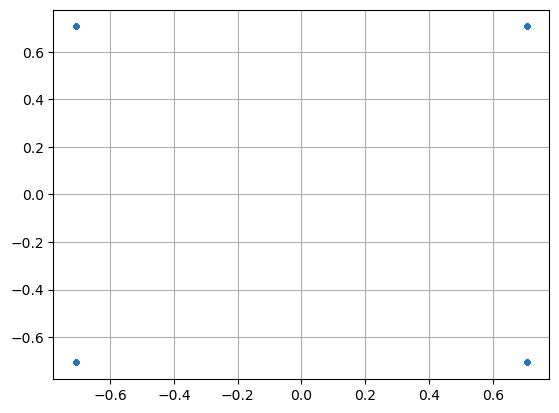

In [23]:
import numpy as np
import matplotlib.pyplot as plt

num_symbols = 1000

x_int = np.random.randint(0, 4, num_symbols) # 0 to 3
x_degrees = x_int*360/4.0 + 45 # 45, 135, 225, 315 degrees
x_radians = x_degrees*np.pi/180.0 # sin() and cos() takes in radians
x_symbols = np.cos(x_radians) + 1j*np.sin(x_radians) # this produces our QPSK complex symbols
plt.plot(np.real(x_symbols), np.imag(x_symbols), '.')
plt.grid(True)
plt.show()

add some noise:

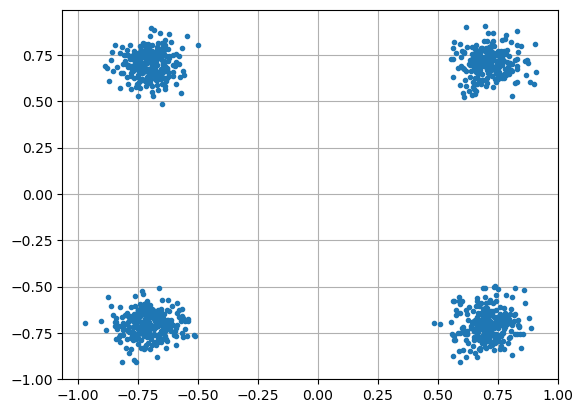

In [4]:
n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.01
r = x_symbols + n * np.sqrt(noise_power)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()

Consider how additive white Gaussian noise (AGWN) produces a uniform spread around each point in the constellation. If there’s too much noise then symbols start passing the boundary (the four quadrants) and will be interpreted by the receiver as an incorrect symbol. Try increasing noise_power until that happens.

For those interested in simulating phase noise, which could result from phase jitter within the local oscillator (LO), replace the r with:

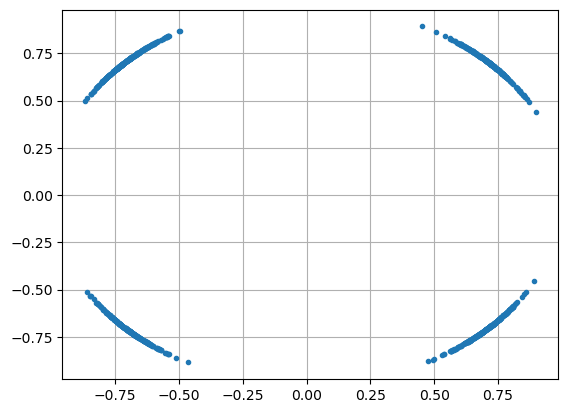

In [5]:
phase_noise = np.random.randn(len(x_symbols)) * 0.1 # adjust multiplier for "strength" of phase noise
r = x_symbols * np.exp(1j*phase_noise)
plt.plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()